In [1]:
# Training Neural Network from Scratch
using LinearAlgebra, Plots

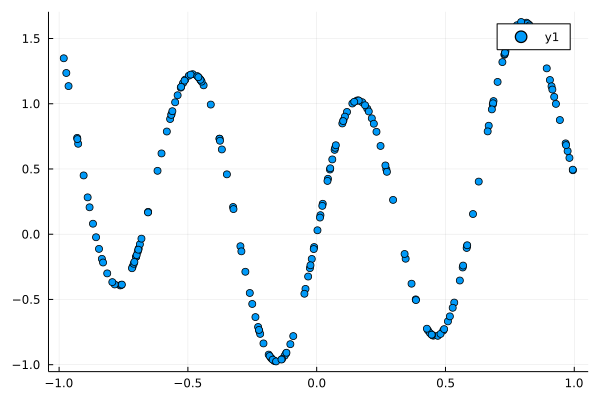

In [2]:
# Generate data for training

iter = 200

# Output
y = zeros(iter)
yd = zeros(iter)

#Inputs
x1 = 2*rand(iter) .- 1

f(x1) = x1^2 + 1*sin(10*x1)

for i = 1:iter
    y[i] = f(x1[i])       # y is the input for calculation of next state
    yd[i] = y[i]          # Output of System for ith instant inputs
end

fig1 = plot()
display(scatter!(fig1, x1, yd))

In [3]:
## Initializing the weights and other parametrs of the NN

n0 = 1            # No of inputs/input neurons
n1 = 30           # no. of Neurons in the first layer
n2 = 30           # No. of Neurons in the second layer
n3 = 1            # No. of Outputs

W1 = 2*rand(n1,n0) .- 1    # weights between hidden and input layer
W2 = 2*rand(n2,n1) .- 1    # weights between hidden and output layer
W3 = 2*rand(n3,n2) .- 1    # weights between hidden and output layer

h1 = zeros(n1)
v1 = zeros(n1)
b1 = 2*rand(n1) .- 1
del1_temp = zeros(n1)
del1 = zeros(n1)

h2 = zeros(n2)
v2 = zeros(n2)
b2 = 2*rand(n2) .- 1
del2_temp = zeros(n2)
del2 = zeros(n2)

h3 = zeros(n3)
v3 = zeros(n3)
b3 = 2*rand(n3) .- 1
del3_temp = zeros(n3)
del3 = zeros(n3)

1-element Vector{Float64}:
 0.0

0

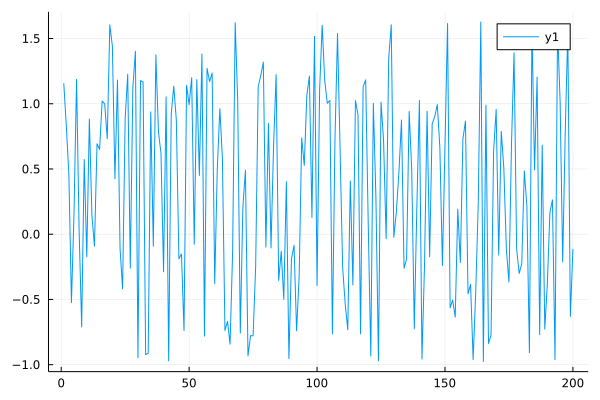

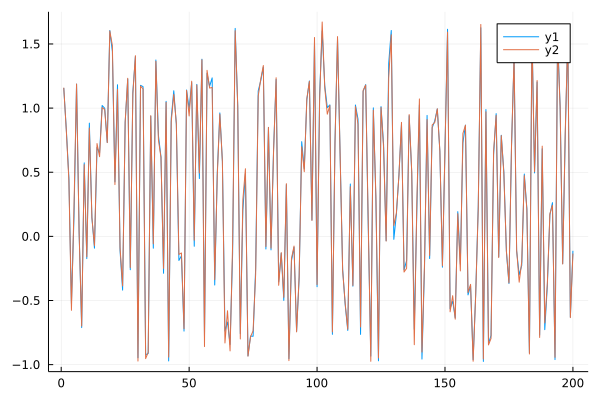

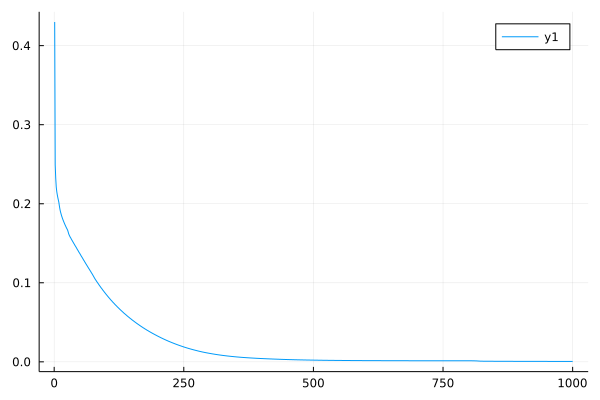

In [4]:
# Training the network
lr = 0.002      # learning rate
epoch = 1000    # no. of epochs
p = 1          # p is the index of each epoch

y2 = zeros(iter)
y2[1] = y[1]
y_act = zeros(iter)

mse1 =  zeros(epoch)
mse = 0

function reLU(x)
    if x >= 0
        return x
    else
        return 0
    end
end

function DreLU(x)
    if x >= 0
        return 1
    else
        return 0
    end
end

while ( p <= epoch )
    for j = 1:iter   # j is the index of each pattern
        x = [x1[j]]
        # Forward evaluation of Neural Network
        # Layer 1
        h1 = W1*x + b1
        v1 = reLU.(h1)
        #Layer 2
        h2 = W2*v1 + b2
        v2 = reLU.(h2)
        # Layer 3
        H = W3*v2 + b3

        #Storing Values
        y_act[j] = H[1]
        y2[j] = H[1]
        mse = mse + 0.5 * ( yd[j] - y_act[j] ) * ( yd[j] - y_act[j] ) / iter    #update of weights

        # Calculation of dels and weight update by backpropogation
        # Layer 3 weight and bais update
        del3[1] = ( yd[j] - y_act[j] )
        W3 = W3 + lr*del3*v2'
        b3 = b3 + lr*del3

        # Layer 2 weight update
        del2_temp =   (W3'*del3)
        del2 =   del2_temp .* DreLU.(h2)
        W2 = W2 + lr*del2*v1'
        b2 = b2 + lr*del2

        # Layer 1 weight update
        del1_temp =   (W2'*del2)
        del1 =   del1_temp .* DreLU.(h1)
        W1 = W1 + lr*del1*x'
        b1 = b1 + lr*del1
    end

    mse1[p] = mse
    global mse = 0
    global p=p+1
end

display(mse)
fig2 = plot()
display(plot!(fig2, yd))
display(plot!(fig2, y_act))


fig3 = plot()
display(plot!(mse1))

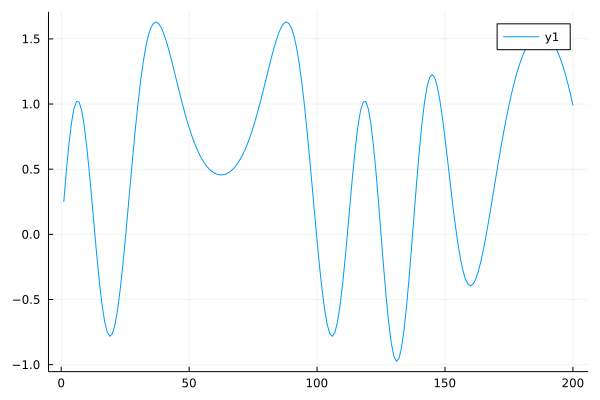

In [5]:
# plot actual test data

iter_t = 200                          # No. of test data set
y = zeros(iter_t)
yd = zeros(iter_t)
u = zeros(iter_t)

for i = 1:iter_t
    if i <= 500
        u[i] = sin( 2*pi*i/250)                     # Test Input Data
    else
        u[i] = 0.8*sin(2*pi*i/250) + 0.2*sin(2*pi*i/25)
    end

    y[i] = f(u[i])    # y is the input for calculation of next state
    yd[i] = y[i]                               # Output of System for ith instant inputs
end
x = zeros(1, iter_t)
for i = 1:iter_t                             # Storing inputs in x for convinience
    x[1,i] =  u[i]
end

fig4 = plot(yd[1:iter_t])

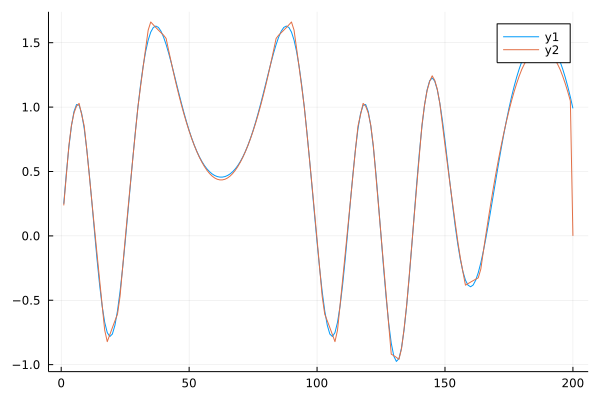

0.0337294084600774

In [6]:
# Plot using Neural Network
y_act = zeros(iter_t)
y_act[1] = y[1]
e = zeros(iter_t)

for j=1:iter_t-1
    # Layer 1
    h1 = W1*x[:,j] + b1
    v1 = reLU.(h1)
    #Layer 2
    h2 = W2*v1 + b2
    v2 = reLU.(h2)
    # Layer 3
    H = W3*v2 + b3

    #Storing Values
    y_act[j] = H[1]

    e[j] = ( y_act[j]-yd[j] ) * ( y_act[j]-yd[j] )
end

display(plot!(fig4, y_act[1:iter_t]))


# RMS Error
e1 = 0
for i=1:iter_t
    e1 = e1 + e[i]
end

rms_err = sqrt(e1/iter)